## ANN-1 vs ANN-2 & ANN-3

In [ ]:
# import data and create testing dataset
import os
import keras
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive/content")

data = np.genfromtxt('bs_data.csv', delimiter=',')

# data prep

# inputs: converting spot price + strike price to moneyness (s/k)
inputs = data[:,:5] 
X = np.array([np.array([x[0]/x[1], x[2],x[3],x[4]])for x in inputs])

# outputs: scaling the prices by the strike price (p/k)
y_calls = np.array(data[:,-2]) / data[:,1]
y_puts = np.array(data[:,-1]) / data[:,1]

X_train = X[:900000]
y_calls_train = y_calls[:900000]
y_puts_train = y_puts[:900000]

X_val = X[900000:950000]
y_calls_val = y_calls[900000:950000]
y_puts_val = y_puts[900000:950000]

X_test = X[950000:]
y_calls_test = y_calls[950000:]
y_puts_test = y_puts[950000:]


print(X_train.shape)
print(y_calls_train.shape)
print(y_puts_train.shape)
print(X_val.shape)
print(y_calls_val.shape)
print(y_puts_val.shape)
print(X_test.shape)
print(y_calls_test.shape)
print(y_puts_test.shape)

Mounted at /content/drive
(900000, 4)
(900000,)
(900000,)
(50000, 4)
(50000,)
(50000,)
(50000, 4)
(50000,)
(50000,)


In [ ]:
ann_1 = keras.models.load_model("ANN-1")

In [ ]:
ann_2 = keras.models.load_model("ANN-2")

In [ ]:
ann_3 = keras.models.load_model("ANN-3")

### Comparison of MSEs

In [ ]:
# average MSE for each model

print('Evaluating...')
ann_1_mse = ann_1.evaluate(X_test, [y_calls_test,y_puts_test])
ann_1_mse_call = ann_1_mse[1]
ann_1_mse_put = ann_1_mse[2]
ann_2_mse = ann_2.evaluate(X_test, y_calls_test)
ann_3_mse = ann_3.evaluate(X_test, y_puts_test)
print('\n')

print('ANN-1 achieves an average MSE of ' + str(ann_1_mse_call) + ' for calls, whereas ANN-2 achieves an average MSE of ' + str(ann_2_mse))
print('ANN-1 achieves an average MSE of ' + str(ann_1_mse_put) + ' for puts, whereas ANN-3 achieves an average MSE of ' + str(ann_3_mse))

Evaluating...
1563/1563 [==============================] - 4s 3ms/step - loss: 2.7584e-08


ANN-1 achieves an average MSE of 5.491400756341136e-08 for calls, whereas ANN-2 achieves an average MSE of 4.189220703665342e-08
ANN-1 achieves an average MSE of 4.9223430664824264e-08 for puts, whereas ANN-3 achieves an average MSE of 2.7583814343756785e-08


Text(0, 0.5, 'Density')

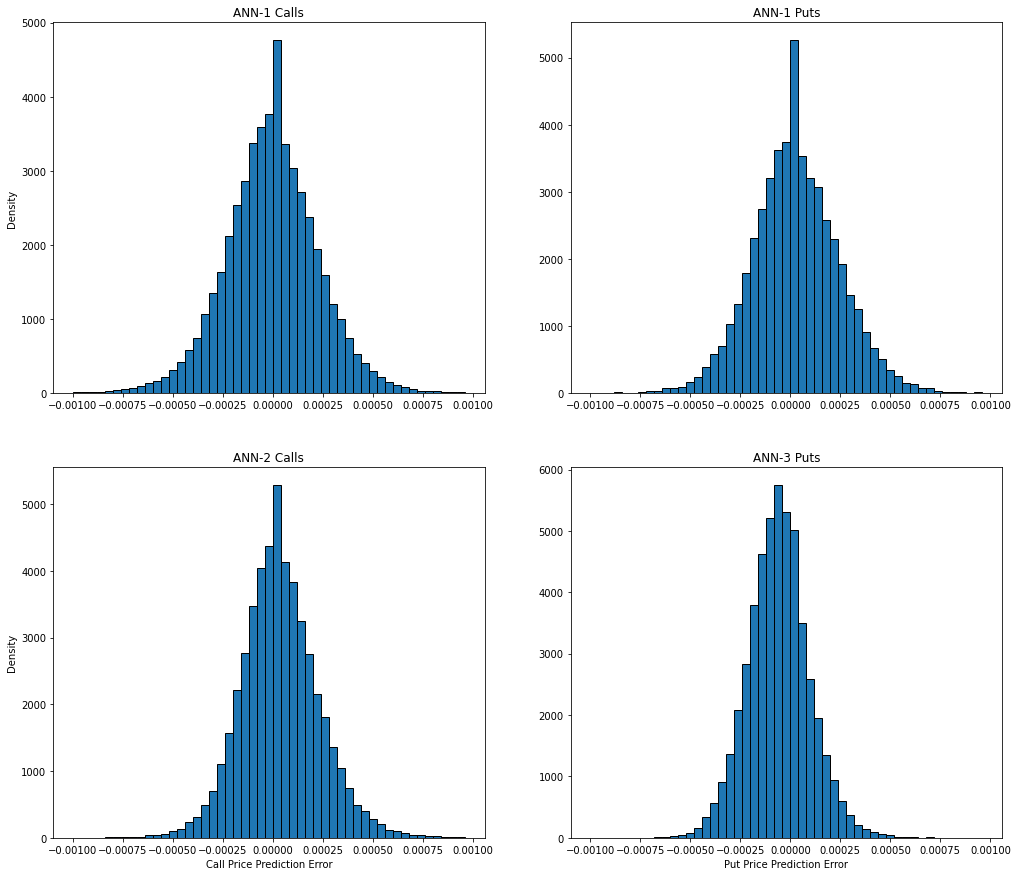

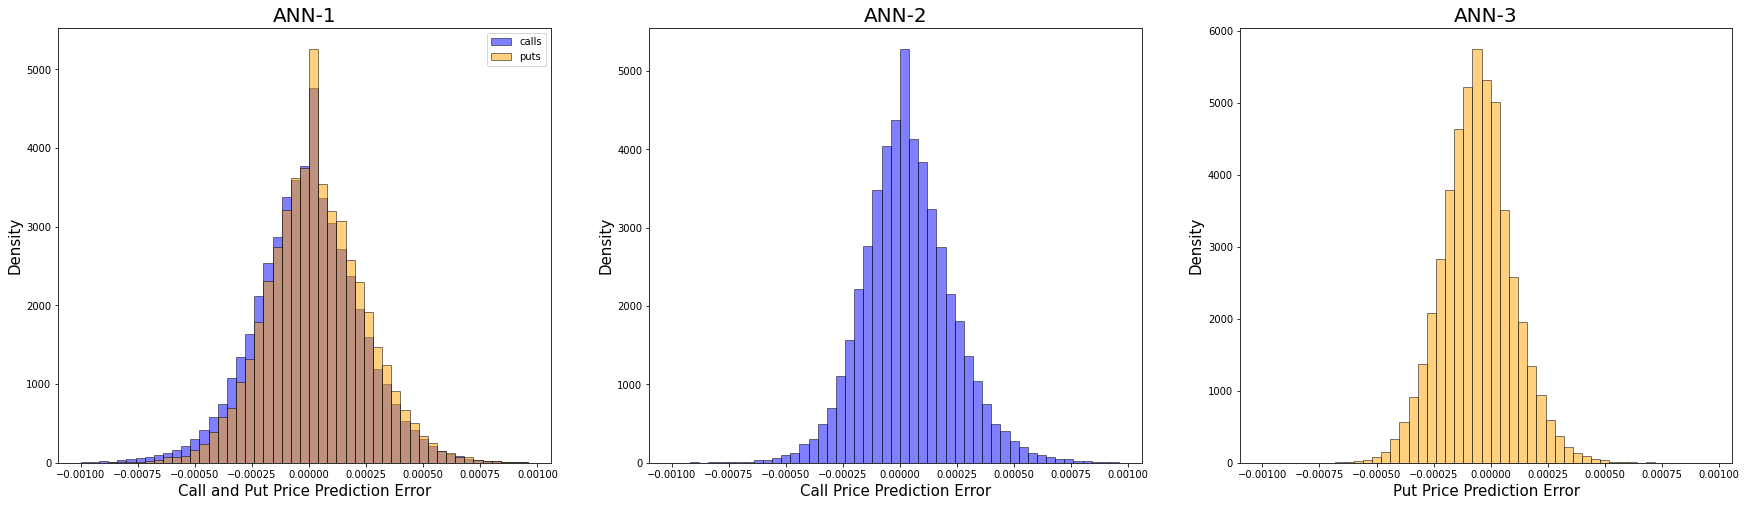

In [ ]:
# histograms of prediction errors

import matplotlib.pyplot as plt

# ann_1
ann_1_predictions = ann_1.predict(X_test)
ann_1_put_preds = ann_1_predictions[1].flatten()
ann_1_put_preds = [0 if put < 0 else put for put in ann_1_put_preds]
ann_1_call_preds = ann_1_predictions[0].flatten()
ann_1_call_preds = [0 if call < 0 else call for call in ann_1_call_preds]
ann_1_call_errors = np.subtract(y_calls_test, ann_1_call_preds)
ann_1_put_errors = np.subtract(y_puts_test, ann_1_put_preds)

# ann_2
ann_2_predictions = ann_2.predict(X_test)
ann_2_call_preds = ann_2_predictions.flatten()
ann_2_call_preds = [0 if call < 0 else call for call in ann_2_call_preds]
ann_2_errors = np.subtract(y_calls_test, ann_2_call_preds)

# ann_3
ann_3_predictions = ann_3.predict(X_test)
ann_3_put_preds = ann_3_predictions.flatten()
ann_3_put_preds = [0 if put < 0 else put for put in ann_3_put_preds]
ann_3_errors = np.subtract(y_puts_test, ann_3_put_preds)


bins = np.arange (-0.001, 0.001, 0.00004)
fig, axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(17)

axs[0, 0].hist(ann_1_call_errors, bins, ec='black')
axs[0, 0].set_title('ANN-1 Calls')
axs[0, 0].set_ylabel('Density')
axs[0, 1].hist(ann_1_put_errors, bins, ec='black')
axs[0, 1].set_title('ANN-1 Puts')
axs[1, 0].hist(ann_2_errors, bins, ec='black')
axs[1, 0].set_title('ANN-2 Calls')
axs[1, 0].set_xlabel('Call Price Prediction Error')
axs[1, 0].set_ylabel('Density')
axs[1, 1].hist(ann_3_errors, bins, ec='black')
axs[1, 1].set_title('ANN-3 Puts')
axs[1, 1].set_xlabel('Put Price Prediction Error')

#fig.savefig('diff_of_models.png')

#alternative plot
fig2, axs2 = plt.subplots(1,3)
fig2.set_figheight(8)
fig2.set_figwidth(30)

axs2[0].hist(ann_1_call_errors, bins, label='calls', alpha=0.5, histtype='bar', ec='black', color='blue')
axs2[0].hist(ann_1_put_errors, bins,label='puts', alpha=0.5, histtype='bar', ec='black', color='orange')
axs2[0].set_title('ANN-1', fontsize=20)
axs2[0].legend(loc='upper right')
axs2[0].set_xlabel('Call and Put Price Prediction Error', fontsize=15)
axs2[0].set_ylabel('Density',fontsize=15)
axs2[1].hist(ann_2_errors, bins, histtype='bar', ec='black', alpha=0.5, color='blue')
axs2[1].set_title('ANN-2', fontsize=20)
axs2[1].set_xlabel('Call Price Prediction Error',fontsize=15)
axs2[1].set_ylabel('Density', fontsize=15)
axs2[2].hist(ann_3_errors, bins, histtype='bar', ec='black', alpha = 0.5, color='orange')
axs2[2].set_title('ANN-3', fontsize=20)
axs2[2].set_xlabel('Put Price Prediction Error', fontsize=15)
axs2[2].set_ylabel('Density', fontsize=15)

#fig2.savefig('new_diff_of_models.png')

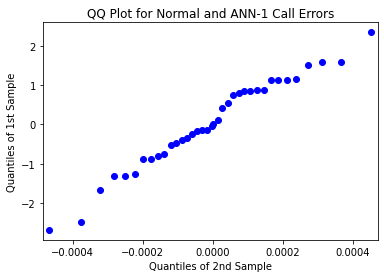

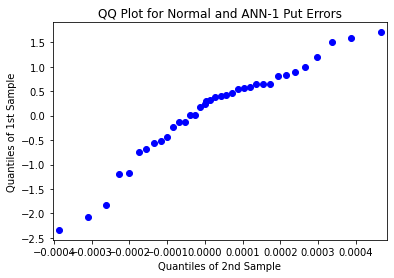

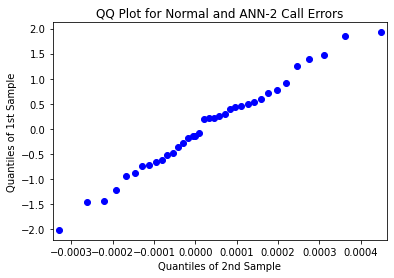

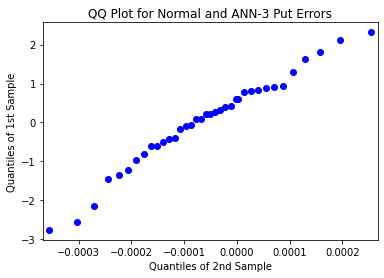

In [ ]:
# inspection of whether the errors are Normally distributed
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

loc, scale = 0,1
# Normal distribution QQ-plot FOR ANN-1 CALLS
s = np.random.normal(loc=loc, scale=scale, size=37)
pp_x = sm.ProbPlot(s)
pp_y = sm.ProbPlot(ann_1_call_errors)

qqplot_2samples(pp_x, pp_y)
plt.title('QQ Plot for Normal and ANN-1 Call Errors')
plt.show()

# Normal distribution QQ-plot FOR ANN-1 PUTS
s = np.random.normal(loc=loc, scale=scale, size=37)
pp_x = sm.ProbPlot(s)
pp_y = sm.ProbPlot(ann_1_put_errors)

qqplot_2samples(pp_x, pp_y)
plt.title('QQ Plot for Normal and ANN-1 Put Errors')
plt.show()

# Normal distribution QQ-plot FOR ANN-2 CALLS
s = np.random.normal(loc=loc, scale=scale, size=37)
pp_x = sm.ProbPlot(s)
pp_y = sm.ProbPlot(ann_2_errors)

qqplot_2samples(pp_x, pp_y)
plt.title('QQ Plot for Normal and ANN-2 Call Errors')
plt.show()

# Normal distribution QQ-plot FOR ANN-3 PUTS
s = np.random.normal(loc=loc, scale=scale, size=37)
pp_x = sm.ProbPlot(s)
pp_y = sm.ProbPlot(ann_3_errors)

qqplot_2samples(pp_x, pp_y)
plt.title('QQ Plot for Normal and ANN-3 Put Errors')
plt.show()

## Unscaled Option Prices

In [ ]:
 # checking extreme values

rescaled_ann_1_call_preds = ann_1_call_preds * data[-50000:,1]
rescaled_ann_1_put_preds = ann_1_put_preds * data[-50000:,1]
rescaled_ann_2_call_preds = ann_2_call_preds * data[-50000:,1]
rescaled_ann_3_put_preds = ann_3_put_preds * data[-50000:,1]

rescaled_differences_ann_1_call = data[-50000:,-2] - rescaled_ann_1_call_preds 
rescaled_differences_ann_1_put = data[-50000:,-1] - rescaled_ann_1_put_preds 
rescaled_differences_ann_2_call = data[-50000:,-2] - rescaled_ann_2_call_preds
rescaled_differences_ann_3_put = data[-50000:,-1] - rescaled_ann_3_put_preds

list_of_differences = [rescaled_differences_ann_1_call, rescaled_differences_ann_1_put, rescaled_differences_ann_2_call, rescaled_differences_ann_3_put]
list_of_names = ['ANN-1 for calls', 'ANN-1 for puts', 'ANN-2', 'ANN-3']

for i in range(4):
  print(list_of_names[i] + ' had the following extreme values: ')
  print('Largest overvaluation: ' + str(max(list_of_differences[i])))
  print('Largest undervaluation: ' + str(min(list_of_differences[i])))
  print('\n')

ANN-1 for calls had the following extreme values: 
Largest overvaluation: 0.35695336989760484
Largest undervaluation: -0.3502920116007431


ANN-1 for puts had the following extreme values: 
Largest overvaluation: 1.0439223609924397
Largest undervaluation: -0.5246368665635543


ANN-2 had the following extreme values: 
Largest overvaluation: 0.3472458950776607
Largest undervaluation: -0.5370443273335699


ANN-3 had the following extreme values: 
Largest overvaluation: 0.7146241889178668
Largest undervaluation: -0.27185464474260357




In [ ]:
# Random price checks of test dataset

import pandas as pd
import random
random.seed(10)

randomlist = []
for i in range(0,10):
  n = random.randint(1,50000)
  randomlist.append(n)

for instance in randomlist:
  row_list = []
  for i in data[-50000+instance, :].flatten():
    row_list.append(round(i,2))
  row_list.append(round(rescaled_ann_1_call_preds[instance], 2))
  row_list.append(round(rescaled_ann_2_call_preds[instance], 2))
  row_list.append(round(rescaled_ann_1_put_preds[instance], 2))
  row_list.append(round(rescaled_ann_3_put_preds[instance], 2))
  print(row_list)

[268.64, 337.41, 0.03, 0.46, 0.52, 17.61, 80.96, 17.53, 17.57, 80.94, 81.06]
[287.14, 381.48, 0.02, 0.89, 0.98, 78.34, 164.37, 78.29, 78.29, 164.21, 164.42]
[236.86, 346.08, 0.1, 0.38, 0.41, 2.77, 99.68, 2.78, 2.72, 99.7, 99.68]
[287.6, 116.07, 0.07, 0.87, 0.11, 178.37, 0.0, 178.45, 178.41, 0.0, 0.0]
[241.36, 257.98, 0.05, 0.58, 0.36, 22.71, 31.36, 22.69, 22.69, 31.31, 31.41]
[274.29, 165.48, 0.03, 0.49, 0.21, 111.13, 0.0, 111.17, 111.1, 0.0, 0.0]
[298.83, 136.26, 0.06, 0.91, 0.73, 177.24, 7.05, 177.21, 177.2, 7.04, 7.08]
[207.85, 111.71, 0.06, 0.5, 0.23, 99.49, 0.0, 99.47, 99.51, 0.01, 0.01]
[284.63, 279.46, 0.06, 0.42, 0.85, 66.97, 54.9, 66.97, 66.95, 54.89, 54.95]
[281.79, 131.96, 0.06, 0.48, 0.21, 153.54, 0.0, 153.55, 153.57, 0.0, 0.03]


In [ ]:
# ANN-1 (call) vs ANN-2 &&& ANN-1 (put) vs ANN-3 

ann_1_better_call = 0
ann_2_better_call = 0
ann_1_equal_ann_2 = 0

ann_1_better_put = 0
ann_3_better_put = 0
ann_1_equal_ann_3 = 0

for i in range(len(rescaled_differences_ann_1_call)):
  if abs(rescaled_differences_ann_1_call[i]) == abs(rescaled_differences_ann_2_call[i]):
    ann_1_equal_ann_2 += 1
  if abs(rescaled_differences_ann_1_call[i]) > abs(rescaled_differences_ann_2_call[i]):
    ann_2_better_call += 1
  if abs(rescaled_differences_ann_1_call[i]) < abs(rescaled_differences_ann_2_call[i]):
    ann_1_better_call += 1
  
  if abs(rescaled_differences_ann_1_put[i]) == abs(rescaled_differences_ann_3_put[i]):
    ann_1_equal_ann_3 += 1
  if abs(rescaled_differences_ann_1_put[i]) > abs(rescaled_differences_ann_3_put[i]):
    ann_3_better_put += 1
  if abs(rescaled_differences_ann_1_put[i]) < abs(rescaled_differences_ann_3_put[i]):
    ann_1_better_put += 1

In [ ]:
print(ann_1_better_call)
print(ann_2_better_call)
print(ann_1_equal_ann_2)
print(ann_1_better_put)
print(ann_3_better_put)
print(ann_1_equal_ann_3)

print(ann_2_better_call - ann_1_better_call)
print(ann_3_better_put - ann_1_better_put)

22158
27132
710
21232
28218
550
4974
6986


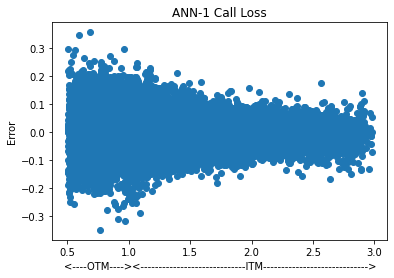

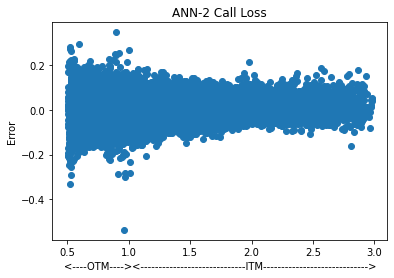

In [ ]:
moneyness = X[-50000:,0]
ann_1_call_moneyness, ann_1_call_moneyness_errors = zip(*sorted(zip(moneyness,rescaled_differences_ann_1_call)))
ann_2_call_moneyness, ann_2_call_moneyness_errors = zip(*sorted(zip(moneyness,rescaled_differences_ann_2_call)))

plt.scatter(ann_1_call_moneyness, ann_1_call_moneyness_errors)
plt.title('ANN-1 Call Loss')
plt.xlabel('<----OTM----><-----------------------------ITM----------------------------->')
plt.ylabel('Error')
plt.show()

plt.scatter(ann_2_call_moneyness, ann_2_call_moneyness_errors)
plt.title('ANN-2 Call Loss')
plt.xlabel('<----OTM----><-----------------------------ITM----------------------------->')
plt.ylabel('Error')
plt.show()

In [ ]:
# why are there extreme values for ANN-1 calls and ANN-2?

import heapq

positive_outliers = heapq.nlargest(5, rescaled_differences_ann_1_call)
negative_outliers = heapq.nsmallest(5, rescaled_differences_ann_1_call)

list_of_positive_outliers = []
for outlier in positive_outliers:
  index = np.where(rescaled_differences_ann_1_call == outlier)
  list_of_positive_outliers.append(data[index].tolist()[0])
  #list_of_positive_outliers.append(X[index][0])

list_of_negative_outliers = []
for outlier in negative_outliers:
  index = np.where(rescaled_differences_ann_1_call == outlier)
  list_of_negative_outliers.append(data[index].tolist()[0])

print('The most extreme positive outliers have the following stats:')
for i in list_of_positive_outliers:
  print(i)
  print('moneyness: '+ str(i[0]/i[1]))

print('\n')
print('The most extreme negative outliers have the following stats:')
for i in list_of_negative_outliers:
  print(i)
  print('moneyness: '+ str(i[0]/i[1]))


The most extreme positive outliers have the following stats:
[254.7983, 290.8303, 0.0256, 0.5427, 0.4879, 24.6643, 56.6837]
moneyness: 0.8761064442047476
[275.8332, 361.4626, 0.036, 0.206, 0.9491, 22.1933, 105.152]
moneyness: 0.763103015360372
[262.3764, 280.2126, 0.0641, 0.6601, 0.1942, 13.7643, 19.9913]
moneyness: 0.9363476160600914
[270.2006, 323.6322, 0.0278, 0.4419, 0.0718, 0.0007, 49.4809]
moneyness: 0.8349002355142658
[270.048, 140.2532, 0.0604, 0.8971, 0.5298, 140.4998, 3.3077]
moneyness: 1.9254320044034647


The most extreme negative outliers have the following stats:
[242.4193, 189.7068, 0.097, 0.3846, 0.9045, 82.4208, 22.7615]
moneyness: 1.2778629970037976
[295.5995, 253.8744, 0.041, 0.5279, 0.4178, 61.5773, 14.4164]
moneyness: 1.1643533180186736
[220.4681, 124.2783, 0.0956, 0.3161, 0.2526, 99.8893, 0.0001]
moneyness: 1.7739870918736416
[236.4361, 120.7258, 0.0401, 0.426, 0.7054, 119.9876, 2.2325]
moneyness: 1.958455442001627
[270.4318, 353.6558, 0.0739, 0.3761, 0.2858, 2.07

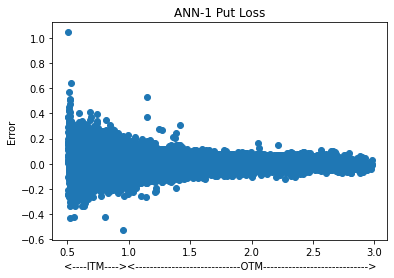

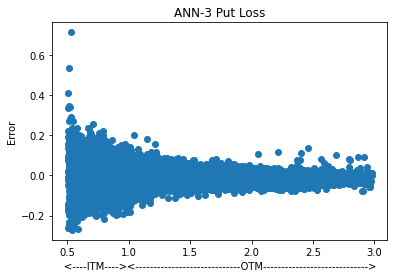

In [ ]:
ann_1_put_moneyness, ann_1_put_moneyness_errors = zip(*sorted(zip(moneyness,rescaled_differences_ann_1_put)))
ann_3_put_moneyness, ann_3_put_moneyness_errors = zip(*sorted(zip(moneyness,rescaled_differences_ann_3_put)))

plt.scatter(ann_1_put_moneyness, ann_1_put_moneyness_errors)
plt.title('ANN-1 Put Loss')
plt.xlabel('<----ITM----><-----------------------------OTM----------------------------->')
plt.ylabel('Error')
plt.show()

plt.scatter(ann_3_put_moneyness, ann_3_put_moneyness_errors)
plt.title('ANN-3 Put Loss')
plt.xlabel('<----ITM----><-----------------------------OTM----------------------------->')
plt.ylabel('Error')
plt.show()

In [ ]:
# why are there extreme values for ANN-1 puts and ANN-3?

import heapq

positive_outliers = heapq.nlargest(5, rescaled_differences_ann_1_put)
negative_outliers = heapq.nsmallest(5, rescaled_differences_ann_1_put)

list_of_positive_outliers = []
for outlier in positive_outliers:
  index = np.where(rescaled_differences_ann_1_put == outlier)
  list_of_positive_outliers.append(data[index].tolist()[0])

list_of_negative_outliers = []
for outlier in negative_outliers:
  index = np.where(rescaled_differences_ann_1_put == outlier)
  list_of_negative_outliers.append(data[index].tolist()[0])

print('The most extreme positive outliers have the following stats:')
for i in list_of_positive_outliers:
  print(i)

print('\n')
print('The most extreme negative outliers have the following stats:')
for i in list_of_negative_outliers:
  print(i)


The most extreme positive outliers have the following stats:
[262.3764, 280.2126, 0.0641, 0.6601, 0.1942, 13.7643, 19.9913]
[264.4513, 190.2733, 0.0234, 0.2323, 0.8144, 84.7117, 9.5022]
[266.4831, 306.9302, 0.0552, 0.5937, 0.2129, 7.0203, 37.5716]
[280.2401, 243.937, 0.0386, 0.779, 0.1423, 44.8672, 1.3382]
[200.5404, 397.5663, 0.0463, 0.6594, 0.4592, 1.6413, 186.7129]


The most extreme negative outliers have the following stats:
[270.9228, 337.753, 0.0916, 0.4912, 0.4883, 19.478, 71.4482]
[249.5845, 128.8979, 0.0236, 0.4091, 0.931, 128.6539, 6.7288]
[292.1453, 356.7596, 0.0667, 0.4559, 0.846, 47.8177, 101.7467]
[258.4557, 317.6533, 0.0405, 0.8969, 0.2607, 10.0825, 57.9486]
[204.1868, 141.1047, 0.0693, 0.8323, 0.9912, 100.2479, 29.2573]


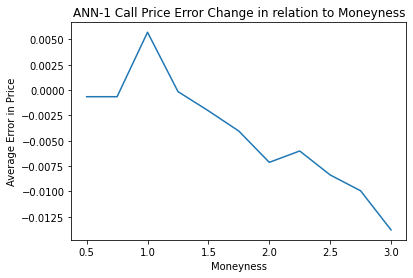

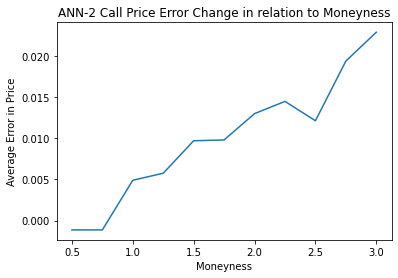

In [ ]:
import statistics
averaging_bins = np.arange(0.5,3.25,0.25)

ann_1_call_list_to_hold_averages = []
ann_2_call_list_to_hold_averages = []

for j in range(len(averaging_bins)):
  if averaging_bins[j] == 0.5:
    pass
  else:
    bin_list = []
    for i in range(len(ann_1_call_moneyness)):
      if ann_1_call_moneyness[i] > averaging_bins[j-1] and ann_1_call_moneyness[i] <= averaging_bins[j]:
        bin_list.append(ann_1_call_moneyness_errors[i])
    average = statistics.mean(bin_list)
    ann_1_call_list_to_hold_averages.append(average)
    if averaging_bins[j] == 0.75:
      ann_1_call_list_to_hold_averages.append(average)

for j in range(len(averaging_bins)):
  if averaging_bins[j] == 0.5:
    pass
  else:
    bin_list = []
    for i in range(len(ann_2_call_moneyness)):
      if ann_2_call_moneyness[i] > averaging_bins[j-1] and ann_2_call_moneyness[i] <= averaging_bins[j]:
        bin_list.append(ann_2_call_moneyness_errors[i])
    average = statistics.mean(bin_list)
    ann_2_call_list_to_hold_averages.append(average)
    if averaging_bins[j] == 0.75:
      ann_2_call_list_to_hold_averages.append(average)

plt.plot(averaging_bins, ann_1_call_list_to_hold_averages)
plt.title('ANN-1 Call Price Error Change in relation to Moneyness')
plt.ylabel('Average Error in Price')
plt.xlabel('Moneyness')
plt.show()

plt.plot(averaging_bins, ann_2_call_list_to_hold_averages)
plt.title('ANN-2 Call Price Error Change in relation to Moneyness')
plt.ylabel('Average Error in Price')
plt.xlabel('Moneyness')
plt.show()

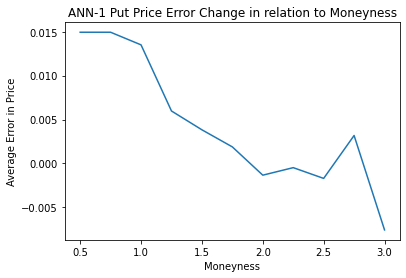

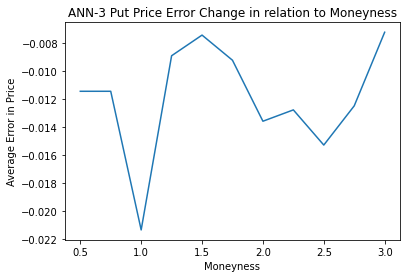

In [ ]:

ann_1_put_list_to_hold_averages = []
ann_3_put_list_to_hold_averages = []

for j in range(len(averaging_bins)):
  if averaging_bins[j] == 0.5:
    pass
  else:
    bin_list = []
    for i in range(len(ann_1_put_moneyness)):
      if ann_1_put_moneyness[i] > averaging_bins[j-1] and ann_1_put_moneyness[i] <= averaging_bins[j]:
        bin_list.append(ann_1_put_moneyness_errors[i])
    average = statistics.mean(bin_list)
    ann_1_put_list_to_hold_averages.append(average)
    if averaging_bins[j] == 0.75:
      ann_1_put_list_to_hold_averages.append(average)

for j in range(len(averaging_bins)):
  if averaging_bins[j] == 0.5:
    pass
  else:
    bin_list = []
    for i in range(len(ann_3_put_moneyness)):
      if ann_3_put_moneyness[i] > averaging_bins[j-1] and ann_3_put_moneyness[i] <= averaging_bins[j]:
        bin_list.append(ann_3_put_moneyness_errors[i])
    average = statistics.mean(bin_list)
    ann_3_put_list_to_hold_averages.append(average)
    if averaging_bins[j] == 0.75:
      ann_3_put_list_to_hold_averages.append(average)

plt.plot(averaging_bins, ann_1_put_list_to_hold_averages)
plt.title('ANN-1 Put Price Error Change in relation to Moneyness')
plt.ylabel('Average Error in Price')
plt.xlabel('Moneyness')
plt.show()

plt.plot(averaging_bins, ann_3_put_list_to_hold_averages)
plt.title('ANN-3 Put Price Error Change in relation to Moneyness')
plt.ylabel('Average Error in Price')
plt.xlabel('Moneyness')
plt.show()

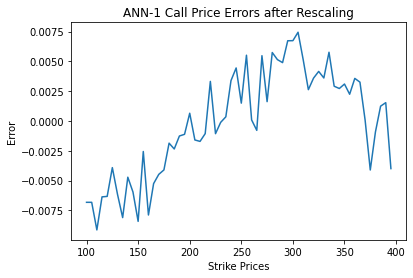

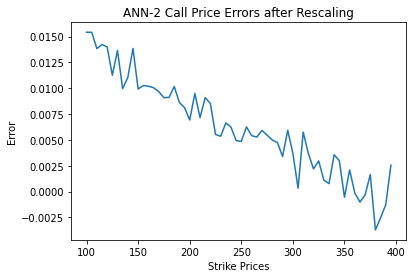

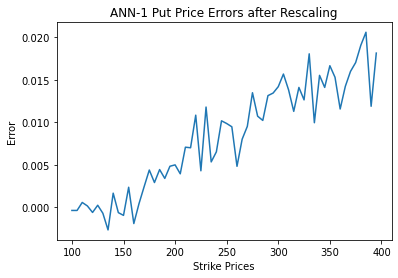

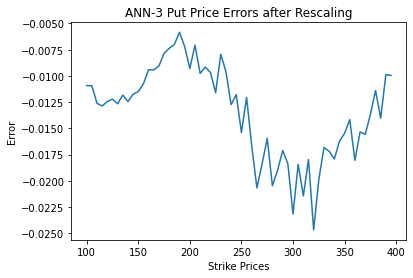

In [ ]:
# Average error according to strike price


strikes_list = data[-50000:,1]
# rescaled_differences_ann_1_call
bins_for_strikes = np.arange(100,400,5)

ann_1_call_list_to_hold_raw_errors = []
ann_2_call_list_to_hold_raw_errors = []
ann_1_put_list_to_hold_raw_errors = []
ann_3_put_list_to_hold_raw_errors = []

for i in range(len(bins_for_strikes)):
  if bins_for_strikes[i] == 100:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(strikes_list)):
      if strikes_list[j] > bins_for_strikes[i-1] and strikes_list[j] <= bins_for_strikes[i]:
        list_for_aggregation.append(rescaled_differences_ann_1_call[j])
    average = statistics.mean(list_for_aggregation)
    ann_1_call_list_to_hold_raw_errors.append(average)
    if bins_for_strikes[i] == 105:
      ann_1_call_list_to_hold_raw_errors.append(average)

for i in range(len(bins_for_strikes)):
  if bins_for_strikes[i] == 100:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(strikes_list)):
      if strikes_list[j] > bins_for_strikes[i-1] and strikes_list[j] <= bins_for_strikes[i]:
        list_for_aggregation.append(rescaled_differences_ann_2_call[j])
    average = statistics.mean(list_for_aggregation)
    ann_2_call_list_to_hold_raw_errors.append(average)
    if bins_for_strikes[i] == 105:
      ann_2_call_list_to_hold_raw_errors.append(average)

for i in range(len(bins_for_strikes)):
  if bins_for_strikes[i] == 100:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(strikes_list)):
      if strikes_list[j] > bins_for_strikes[i-1] and strikes_list[j] <= bins_for_strikes[i]:
        list_for_aggregation.append(rescaled_differences_ann_1_put[j])
    average = statistics.mean(list_for_aggregation)
    ann_1_put_list_to_hold_raw_errors.append(average)
    if bins_for_strikes[i] == 105:
      ann_1_put_list_to_hold_raw_errors.append(average)

for i in range(len(bins_for_strikes)):
  if bins_for_strikes[i] == 100:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(strikes_list)):
      if strikes_list[j] > bins_for_strikes[i-1] and strikes_list[j] <= bins_for_strikes[i]:
        list_for_aggregation.append(rescaled_differences_ann_3_put[j])
    average = statistics.mean(list_for_aggregation)
    ann_3_put_list_to_hold_raw_errors.append(average)
    if bins_for_strikes[i] == 105:
      ann_3_put_list_to_hold_raw_errors.append(average)


plt.plot(bins_for_strikes, ann_1_call_list_to_hold_raw_errors)
plt.title('ANN-1 Call Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Strike Prices')
plt.show()

plt.plot(bins_for_strikes, ann_2_call_list_to_hold_raw_errors)
plt.title('ANN-2 Call Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Strike Prices')
plt.show()

plt.plot(bins_for_strikes, ann_1_put_list_to_hold_raw_errors)
plt.title('ANN-1 Put Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Strike Prices')
plt.show()

plt.plot(bins_for_strikes, ann_3_put_list_to_hold_raw_errors)
plt.title('ANN-3 Put Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Strike Prices')
plt.show()

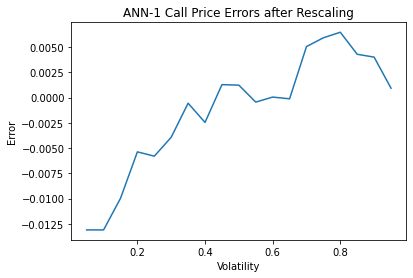

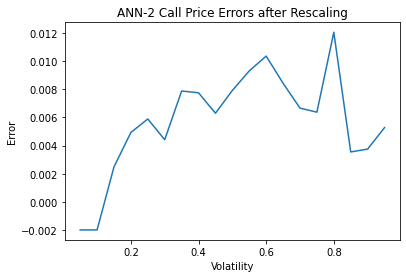

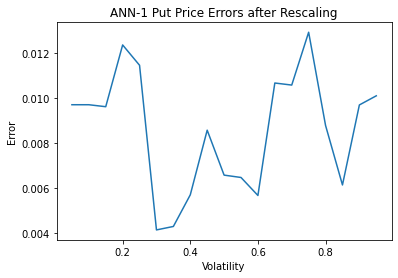

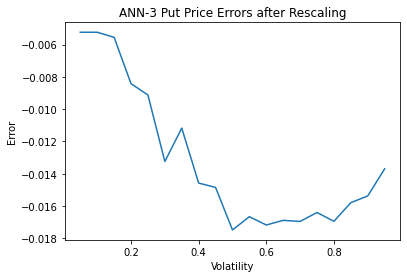

In [ ]:
# Average error according to volatility level

vol_list = data[-50000:,4]
# rescaled_differences_ann_1_call
bins_for_vol = np.arange(0.05,1,0.05)

ann_1_call_list_to_hold_raw_errors2 = []
ann_2_call_list_to_hold_raw_errors2 = []
ann_1_put_list_to_hold_raw_errors2 = []
ann_3_put_list_to_hold_raw_errors2 = []

for i in range(len(bins_for_vol)):
  if bins_for_vol[i] == 0.05:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(vol_list)):
      if vol_list[j] > bins_for_vol[i-1] and vol_list[j] <= bins_for_vol[i]:
        list_for_aggregation.append(rescaled_differences_ann_1_call[j])
    average = statistics.mean(list_for_aggregation)
    ann_1_call_list_to_hold_raw_errors2.append(average)
    if bins_for_vol[i] == 0.1:
      ann_1_call_list_to_hold_raw_errors2.append(average)

for i in range(len(bins_for_vol)):
  if bins_for_vol[i] == 0.05:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(vol_list)):
      if vol_list[j] > bins_for_vol[i-1] and vol_list[j] <= bins_for_vol[i]:
        list_for_aggregation.append(rescaled_differences_ann_2_call[j])
    average = statistics.mean(list_for_aggregation)
    ann_2_call_list_to_hold_raw_errors2.append(average)
    if bins_for_vol[i] == 0.1:
      ann_2_call_list_to_hold_raw_errors2.append(average)

for i in range(len(bins_for_vol)):
  if bins_for_vol[i] == 0.05:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(vol_list)):
      if vol_list[j] > bins_for_vol[i-1] and vol_list[j] <= bins_for_vol[i]:
        list_for_aggregation.append(rescaled_differences_ann_1_put[j])
    average = statistics.mean(list_for_aggregation)
    ann_1_put_list_to_hold_raw_errors2.append(average)
    if bins_for_vol[i] == 0.1:
      ann_1_put_list_to_hold_raw_errors2.append(average)

for i in range(len(bins_for_vol)):
  if bins_for_vol[i] == 0.05:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(vol_list)):
      if vol_list[j] > bins_for_vol[i-1] and vol_list[j] <= bins_for_vol[i]:
        list_for_aggregation.append(rescaled_differences_ann_3_put[j])
    average = statistics.mean(list_for_aggregation)
    ann_3_put_list_to_hold_raw_errors2.append(average)
    if bins_for_vol[i] == 0.1:
      ann_3_put_list_to_hold_raw_errors2.append(average)


plt.plot(bins_for_vol, ann_1_call_list_to_hold_raw_errors2)
plt.title('ANN-1 Call Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Volatility')
plt.show()

plt.plot(bins_for_vol, ann_2_call_list_to_hold_raw_errors2)
plt.title('ANN-2 Call Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Volatility')
plt.show()

plt.plot(bins_for_vol, ann_1_put_list_to_hold_raw_errors2)
plt.title('ANN-1 Put Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Volatility')
plt.show()

plt.plot(bins_for_vol, ann_3_put_list_to_hold_raw_errors2)
plt.title('ANN-3 Put Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Volatility')
plt.show()

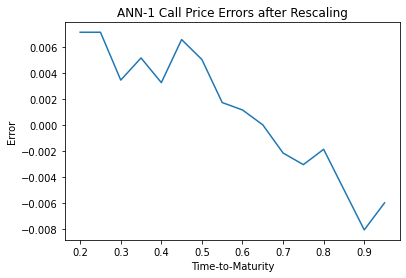

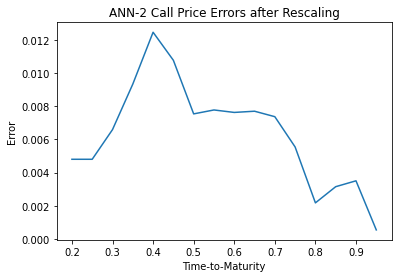

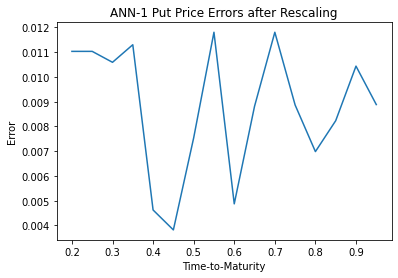

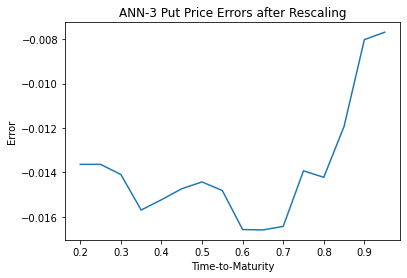

In [ ]:
# Average error according to Time-to-Maturity

ttm_list = data[-50000:,3]
# rescaled_differences_ann_1_call
bins_for_ttm = np.arange(0.2,1,0.05)

ann_1_call_list_to_hold_raw_errors3 = []
ann_2_call_list_to_hold_raw_errors3 = []
ann_1_put_list_to_hold_raw_errors3 = []
ann_3_put_list_to_hold_raw_errors3 = []

for i in range(len(bins_for_ttm)):
  if bins_for_ttm[i] == 0.2:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(ttm_list)):
      if ttm_list[j] > bins_for_ttm[i-1] and ttm_list[j] <= bins_for_ttm[i]:
        list_for_aggregation.append(rescaled_differences_ann_1_call[j])
    average = statistics.mean(list_for_aggregation)
    ann_1_call_list_to_hold_raw_errors3.append(average)
    if bins_for_ttm[i] == 0.25:
      ann_1_call_list_to_hold_raw_errors3.append(average)

for i in range(len(bins_for_ttm)):
  if bins_for_ttm[i] == 0.2:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(ttm_list)):
      if ttm_list[j] > bins_for_ttm[i-1] and ttm_list[j] <= bins_for_ttm[i]:
        list_for_aggregation.append(rescaled_differences_ann_2_call[j])
    average = statistics.mean(list_for_aggregation)
    ann_2_call_list_to_hold_raw_errors3.append(average)
    if bins_for_ttm[i] == 0.25:
      ann_2_call_list_to_hold_raw_errors3.append(average)

for i in range(len(bins_for_ttm)):
  if bins_for_ttm[i] == 0.2:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(ttm_list)):
      if ttm_list[j] > bins_for_ttm[i-1] and ttm_list[j] <= bins_for_ttm[i]:
        list_for_aggregation.append(rescaled_differences_ann_1_put[j])
    average = statistics.mean(list_for_aggregation)
    ann_1_put_list_to_hold_raw_errors3.append(average)
    if bins_for_ttm[i] == 0.25:
      ann_1_put_list_to_hold_raw_errors3.append(average)

for i in range(len(bins_for_ttm)):
  if bins_for_ttm[i] == 0.2:
    pass
  else:
    list_for_aggregation = []
    for j in range(len(ttm_list)):
      if ttm_list[j] > bins_for_ttm[i-1] and ttm_list[j] <= bins_for_ttm[i]:
        list_for_aggregation.append(rescaled_differences_ann_3_put[j])
    average = statistics.mean(list_for_aggregation)
    ann_3_put_list_to_hold_raw_errors3.append(average)
    if bins_for_ttm[i] == 0.25:
      ann_3_put_list_to_hold_raw_errors3.append(average)


plt.plot(bins_for_ttm, ann_1_call_list_to_hold_raw_errors3)
plt.title('ANN-1 Call Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Time-to-Maturity')
plt.show()

plt.plot(bins_for_ttm, ann_2_call_list_to_hold_raw_errors3)
plt.title('ANN-2 Call Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Time-to-Maturity')
plt.show()

plt.plot(bins_for_ttm, ann_1_put_list_to_hold_raw_errors3)
plt.title('ANN-1 Put Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Time-to-Maturity')
plt.show()

plt.plot(bins_for_ttm, ann_3_put_list_to_hold_raw_errors3)
plt.title('ANN-3 Put Price Errors after Rescaling')
plt.ylabel('Error')
plt.xlabel('Time-to-Maturity')
plt.show()

In [ ]:
# Correlation test to see what impacts errors

moneyness_corr = np.corrcoef(ann_1_call_moneyness, ann_1_call_moneyness_errors)
strikes_corr = np.corrcoef(strikes_list, rescaled_differences_ann_1_call)
vol_corr = np.corrcoef(vol_list, rescaled_differences_ann_1_call)
ttm_corr = np.corrcoef(ttm_list, rescaled_differences_ann_1_call)
print(moneyness_corr)
print(strikes_corr)
print(vol_corr)
print(ttm_corr)

[[ 1.         -0.06000341]
 [-0.06000341  1.        ]]
[[1.         0.04982389]
 [0.04982389 1.        ]]
[[1.         0.08928188]
 [0.08928188 1.        ]]
[[ 1.         -0.09018115]
 [-0.09018115  1.        ]]


## How do the models handle out-of-sample data?

In [ ]:
out_of_sample_data = np.genfromtxt('out_of_sample_bs_data.csv', delimiter=',')

# inputs: converting spot price + strike price to moneyness (s/k)
oos_inputs = out_of_sample_data[:,:5] 
oos_X = np.array([np.array([x[0]/x[1], x[2],x[3],x[4]])for x in oos_inputs])

# outputs: scaling the prices by the strike price (p/k)
oos_y_calls = np.array(out_of_sample_data[:,-2]) / out_of_sample_data[:,1]
oos_y_puts = np.array(out_of_sample_data[:,-1]) / out_of_sample_data[:,1]

In [ ]:
# predictions by ANN-1 on oos

print('Evaluating...')
oos_ann_1_mse = ann_1.evaluate(oos_X, [oos_y_calls,oos_y_puts])
oos_ann_1_mse_call = oos_ann_1_mse[1]
oos_ann_1_mse_put = oos_ann_1_mse[2]
oos_ann_2_mse = ann_2.evaluate(oos_X, oos_y_calls)
oos_ann_3_mse = ann_3.evaluate(oos_X, oos_y_puts)
print('\n')

print('ANN-1 achieves an average MSE of ' + str(oos_ann_1_mse_call) + ' for calls, whereas ANN-2 achieves an average MSE of ' + str(oos_ann_2_mse))
print('ANN-1 achieves an average MSE of ' + str(oos_ann_1_mse_put) + ' for puts, whereas ANN-3 achieves an average MSE of ' + str(oos_ann_3_mse))

Evaluating...
1563/1563 [==============================] - 5s 3ms/step - loss: 2.5747e-08


ANN-1 achieves an average MSE of 5.13271665170123e-08 for calls, whereas ANN-2 achieves an average MSE of 3.575546969614152e-08
ANN-1 achieves an average MSE of 4.552188670459145e-08 for puts, whereas ANN-3 achieves an average MSE of 2.5746832221784643e-08


## Speed Comparison

In [ ]:
import time
from option_pricing_formulas import Black_scholes

# 1 Sample

one_prediction_ann_1 = 0
one_prediction_ann_2_ann_3 = 0
one_prediction_bs = 0

# ANN-1
for i in range(10):
  start_time = time.time()
  predictions_1 = ann_1.predict(np.array([X_test[0]]))
  predictions_1_call = predictions_1[0].flatten()
  predictions_1_call = np.multiply([0 if call < 0 else call for call in predictions_1_call], data[-50000,1])
  predictions_1_put = predictions_1[1].flatten()
  predictions_1_put = np.multiply([0 if put < 0 else put for put in predictions_1_put], data[-50000,1])
  ann_1_time = time.time() - start_time
  one_prediction_ann_1 += ann_1_time

  # ANN-2 & ANN-3
  start_time = time.time()
  predictions_2 = ann_2.predict(np.array([X_test[0]]))
  predictions_2 = predictions_2.flatten()
  predictions_2_call = np.multiply([0 if call < 0 else call for call in predictions_1_call], data[-50000,1])
  predictions_3 = ann_2.predict(np.array([X_test[0]]))
  predictions_3 = predictions_3.flatten()
  predictions_3_put = np.multiply([0 if put < 0 else put for put in predictions_1_call], data[-50000,1])
  ann_2_3_time = time.time() - start_time
  one_prediction_ann_2_ann_3 += ann_2_3_time

  # BS
  start_time = time.time()
  for i in range(1):
    call_price = Black_scholes('call',inputs[-50000 + i][0], inputs[-50000 + i][1],inputs[-50000 + i][2],
                            inputs[-50000 + i][3], inputs[-50000 + i][4])
    put_price = Black_scholes('put',inputs[i][0], inputs[i][1], inputs[i][2],
                            inputs[-50000 + i][3], inputs[-50000 + i][4])
  bs_time = time.time() - start_time
  one_prediction_bs += bs_time


print("ANN-1 took " + str(one_prediction_ann_1 / 10) + " seconds on average to price a call and put")
print("ANN-2 & ANN-3 took " + str(one_prediction_ann_2_ann_3 / 10) + " seconds on average to price a call and put")
print("Black-Scholes took " + str(one_prediction_bs / 10) + " seconds on average to price a call and put")

ANN-1 took 0.059337186813354495 seconds on average to price a call and put
ANN-2 & ANN-3 took 0.12083382606506347 seconds on average to price a call and put
Black-Scholes took 0.0007007598876953125 seconds on average to price a call and put


In [ ]:
# 100 Samples

hundred_prediction_ann_1 = 0
hundred_prediction_ann_2_ann_3 = 0
hundred_prediction_bs = 0

# ANN-1
for i in range(10):
  start_time = time.time()
  predictions_1 = ann_1.predict(X_test[:100])
  predictions_1_call = predictions_1[0].flatten()
  predictions_1_call = np.multiply([0 if call < 0 else call for call in predictions_1_call], data[-50000:-49900,1])
  predictions_1_put = predictions_1[1].flatten()
  predictions_1_put = np.multiply([0 if put < 0 else put for put in predictions_1_put], data[-50000:-49900,1])
  ann_1_time = time.time() - start_time
  hundred_prediction_ann_1 += ann_1_time

  # ANN-2 & ANN-3
  start_time = time.time()
  predictions_2 = ann_2.predict(X_test[:100])
  predictions_2 = predictions_2.flatten()
  predictions_2_call = np.multiply([0 if call < 0 else call for call in predictions_1_call], data[-50000:-49900,1])
  predictions_3 = ann_2.predict(X_test[:100])
  predictions_3 = predictions_3.flatten()
  predictions_3_put = np.multiply([0 if put < 0 else put for put in predictions_1_call], data[-50000:-49900,1])
  ann_2_3_time = time.time() - start_time
  hundred_prediction_ann_2_ann_3 += ann_2_3_time

  # BS
  start_time = time.time()
  for i in range(100):
    call_price = Black_scholes('call',inputs[-50000 + i][0], inputs[-50000 + i][1],inputs[-50000 + i][2],
                            inputs[-50000 + i][3], inputs[-50000 + i][4])
    put_price = Black_scholes('put',inputs[i][0], inputs[i][1], inputs[i][2],
                            inputs[-50000 + i][3], inputs[-50000 + i][4])
  bs_time = time.time() - start_time
  hundred_prediction_bs += bs_time

print("ANN-1 took " + str(hundred_prediction_ann_1 / 10) + " seconds on average to price 100 calls and puts")
print("ANN-2 & ANN-3 took " + str(hundred_prediction_ann_2_ann_3 / 10) + " seconds on average to price 100 calls and puts")
print("Black-Scholes took " + str(hundred_prediction_bs / 10) + " seconds on average to price 100 calls and puts")

ANN-1 took 0.06177701950073242 seconds on average to price 100 calls and puts
ANN-2 & ANN-3 took 0.13155734539031982 seconds on average to price 100 calls and puts
Black-Scholes took 0.03792240619659424 seconds on average to price 100 calls and puts


In [ ]:
# When does ANN-1 compute prices faster than the classical Black-Scholes model?

# ANN-1
for sample_size in range(100,500):

  xxx_prediction_ann_1 = 0
  xxx_prediction_ann_2_ann_3 = 0
  xxx_prediction_bs = 0

  for i in range(5):
    start_time = time.time()
    predictions_1 = ann_1.predict(X_test[:sample_size])
    predictions_1_call = predictions_1[0].flatten()
    predictions_1_call = np.multiply([0 if call < 0 else call for call in predictions_1_call], data[-50000:-50000 + sample_size,1])
    predictions_1_put = predictions_1[1].flatten()
    predictions_1_put = np.multiply([0 if put < 0 else put for put in predictions_1_put], data[-50000:-50000 + sample_size,1])
    ann_1_time = time.time() - start_time
    xxx_prediction_ann_1 += ann_1_time

    # ANN-2 & ANN-3
    start_time = time.time()
    predictions_2 = ann_2.predict(X_test[:sample_size])
    predictions_2 = predictions_2.flatten()
    predictions_2_call = np.multiply([0 if call < 0 else call for call in predictions_1_call], data[-50000:-50000 + sample_size,1])
    predictions_3 = ann_2.predict(X_test[:sample_size])
    predictions_3 = predictions_3.flatten()
    predictions_3_put = np.multiply([0 if put < 0 else put for put in predictions_1_call], data[-50000:-50000 + sample_size,1])
    ann_2_3_time = time.time() - start_time
    xxx_prediction_ann_2_ann_3 += ann_2_3_time

    # BS
    start_time = time.time()
    for i in range(sample_size):
      call_price = Black_scholes('call',inputs[-50000 + i][0], inputs[-50000 + i][1],inputs[-50000 + i][2],
                              inputs[-50000 + i][3], inputs[-50000 + i][4])
      put_price = Black_scholes('put',inputs[i][0], inputs[i][1], inputs[i][2],
                              inputs[-50000 + i][3], inputs[-50000 + i][4])
    bs_time = time.time() - start_time
    xxx_prediction_bs += bs_time

  if (xxx_prediction_ann_1 / 5) < (xxx_prediction_bs / 5):
    print('ANN-1 outperforms the Black-Scholes model when ' + str(sample_size) +' or more price parameters need to be calculated')
    print('\n')
    print("ANN-1 took " + str(xxx_prediction_ann_1 / 5) + ' seconds on average to price ' + str(sample_size) + ' calls and puts')
    print("ANN-2 & ANN-3 took " + str(xxx_prediction_ann_2_ann_3 / 5) + 'seconds on average to price ' + str(sample_size) + ' calls and puts')
    print("Black-Scholes took " + str(xxx_prediction_bs / 5) + 'seconds on average to price ' + str(sample_size) + ' calls and puts')
    break

ANN-1 outperforms the Black-Scholes model when 137 or more price parameters need to be calculated


ANN-1 took 0.06258482933044433 seconds on average to price 137 calls and puts
ANN-2 & ANN-3 took 0.11999402046203614seconds on average to price 137 calls and puts
Black-Scholes took 0.06393680572509766seconds on average to price 137 calls and puts


In [ ]:
# 1000 Samples

thousand_prediction_ann_1 = 0
thousand_prediction_ann_2_ann_3 = 0
thousand_prediction_bs = 0

# ANN-1
for i in range(10):
  start_time = time.time()
  predictions_1 = ann_1.predict(X_test[:1000])
  predictions_1_call = predictions_1[0].flatten()
  predictions_1_call = np.multiply([0 if call < 0 else call for call in predictions_1_call], data[-50000:-49000,1])
  predictions_1_put = predictions_1[1].flatten()
  predictions_1_put = np.multiply([0 if put < 0 else put for put in predictions_1_put], data[-50000:-49000,1])
  ann_1_time = time.time() - start_time
  thousand_prediction_ann_1 += ann_1_time

  # ANN-2 & ANN-3
  start_time = time.time()
  predictions_2 = ann_2.predict(X_test[:1000])
  predictions_2 = predictions_2.flatten()
  predictions_2_call = np.multiply([0 if call < 0 else call for call in predictions_1_call], data[-50000:-49000,1])
  predictions_3 = ann_2.predict(X_test[:1000])
  predictions_3 = predictions_3.flatten()
  predictions_3_put = np.multiply([0 if put < 0 else put for put in predictions_1_call], data[-50000:-49000,1])
  ann_2_3_time = time.time() - start_time
  thousand_prediction_ann_2_ann_3 += ann_2_3_time

  # BS
  start_time = time.time()
  for i in range(1000):
    call_price = Black_scholes('call',inputs[-50000 + i][0], inputs[-50000 + i][1],inputs[-50000 + i][2],
                            inputs[-50000 + i][3], inputs[-50000 + i][4])
    put_price = Black_scholes('put',inputs[i][0], inputs[i][1], inputs[i][2],
                            inputs[-50000 + i][3], inputs[-50000 + i][4])
  bs_time = time.time() - start_time
  thousand_prediction_bs += bs_time

print("ANN-1 took " + str(thousand_prediction_ann_1 / 10) + " seconds on average to price 1000 calls and puts")
print("ANN-2 & ANN-3 took " + str(thousand_prediction_ann_2_ann_3 / 10) + " seconds on average to price 1000 calls and puts")
print("Black-Scholes took " + str(thousand_prediction_bs / 10) + " seconds on average to price 1000 calls and puts")

ANN-1 took 0.1314418077468872 seconds on average to price 1000 calls and puts
ANN-2 & ANN-3 took 0.24121732711791993 seconds on average to price 1000 calls and puts
Black-Scholes took 0.4388317346572876 seconds on average to price 1000 calls and puts
